# **Building a Classification Tree to Predict whether a Person has Heart disease or not (hd)**

---



# Step 1: Understanding the Data
There are a total of 14 columns (Features - 13 , Target - 1) Now Lets get a jist on these columns to understand the dataset better which will help in solving in predicting whether a person has heart disease or not


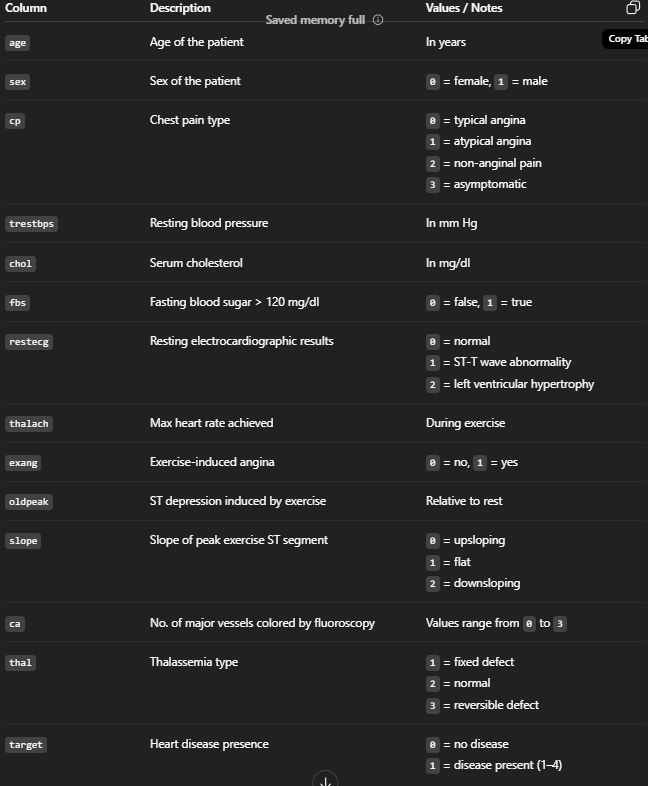

cp --> values ranges from (1 to 4) not (0 - 4),
thal --> values  ranges (6,3,7) in this processed cleveland dataset





In [2]:
# Uploading the dataset since We are using Google Colab
from google.colab import files
uploaded = files.upload()

Saving processed.cleveland.data to processed.cleveland.data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score

In [5]:
df = pd.read_csv("processed.cleveland.data",header=None) # when you open the dataset there is no column names, only the values
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In general since we start with data preprocessing it will be easier to name our columns. this is not mandatory. but it can help in interpretation and understanding

In [6]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
 'restecg', 'thalach', 'exang', 'oldpeak',
 'slope', 'ca', 'thal', 'target']

df.head(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


# Step 2: Preprocessing the Data
1.  Handling missing Values
2. Splitting Data for training and testing
3. Encoding

In [7]:
df.shape # (no of rows/records, no of columns)

(303, 14)

In [8]:
df.isnull().sum() # no of null values present in each column

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


But here is the problem there might be chances of irrelevant data such as (!,@,#,:,.) etc in the data set

In [9]:
df.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


As you can see all values have float64, Int64 datatype except the columns:(ca , thal)
any value in python can be classified as an object. we need to introspect further...

In [10]:
print(df["ca"].unique()) # prints all the unique values present in the mentioned column
print(df["thal"].unique())


['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [11]:
missing_rows = df[(df['ca'] == '?') | (df['thal'] == '?')] # prints rows with ? in ca or thal
print(len(missing_rows)) # total no of missing rows


6


In [12]:
missing_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Out of 303 records only 6 records are corrupted so we can remove this data as a data preprocessing measure. In cases where there are more corrupted data Since (ca,thal) values are a range, missing data can be replaced with mode value of its column. for numerical values (we can also replace by mean/median) an Example is illustrated below

In [13]:
df_demo = df.copy()
df_demo.replace('?', np.nan, inplace=True)
df_demo['ca'] = df_demo['ca'].fillna(df_demo['ca'].mode()[0]) # replaced with most frequently occuring value
print(df_demo['ca'].unique()) # no more ? present.
# Same can be done for thal.


['0.0' '3.0' '2.0' '1.0']


In [14]:
df_cleaned = df[(df['ca'] != '?') & (df['thal'] != '?')]
print(df_cleaned['ca'].unique())
print(df_cleaned['thal'].unique())


['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


In [15]:
X = df_cleaned[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
 'restecg', 'thalach', 'exang', 'oldpeak',
 'slope', 'ca', 'thal']]

X.head(1)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0


In [16]:
X.shape # only 13 columns present, removed the target variable

(297, 13)

In [17]:
y = df_cleaned["target"]
y.head(3)

,target
0,0
1,2
2,1


In [18]:
y.shape # used as a pandas Data series

(297,)

Now we move onto the process of One-Hot Encoding
The reason One hot Encoding is done because we want our categorical values to have no ordinal relations their rank such as (1,2,3,4) dont mean anything they are just numerical values which represents a category

In [19]:
X_encoded = pd.get_dummies(X,columns = ['cp','thal','restecg','slope']) # these are the categorical features which require encoding

In [20]:
X_encoded.head(2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,thal_3.0,thal_6.0,thal_7.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,True,False,False,False,True,False,False,True
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,True,False,False,False,False,True,False,True,False


The target value has range from (0-4) where everthing except 0 represents person has Heart Disease so make it a binary class classification.

In [21]:
print(y)

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: target, Length: 297, dtype: int64


In [22]:
y_binary = np.where(y > 0, 1, 0)
y_binary

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

# Step 3 : Building the Classification Tree (Training the model)

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X_encoded,y_binary,test_size=0.3,random_state=42,stratify=y_binary)
# Stratify keeps the class ratio balanced in training and testing

In [24]:
print("X_train split %: ",(X_train.shape[0]/X_encoded.shape[0])*100)
print("X_test split %: ",((X_test.shape[0]/X_encoded.shape[0])*100))

X_train split %:  69.6969696969697
X_test split %:  30.303030303030305


In [25]:
model = DecisionTreeClassifier(random_state=42)

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

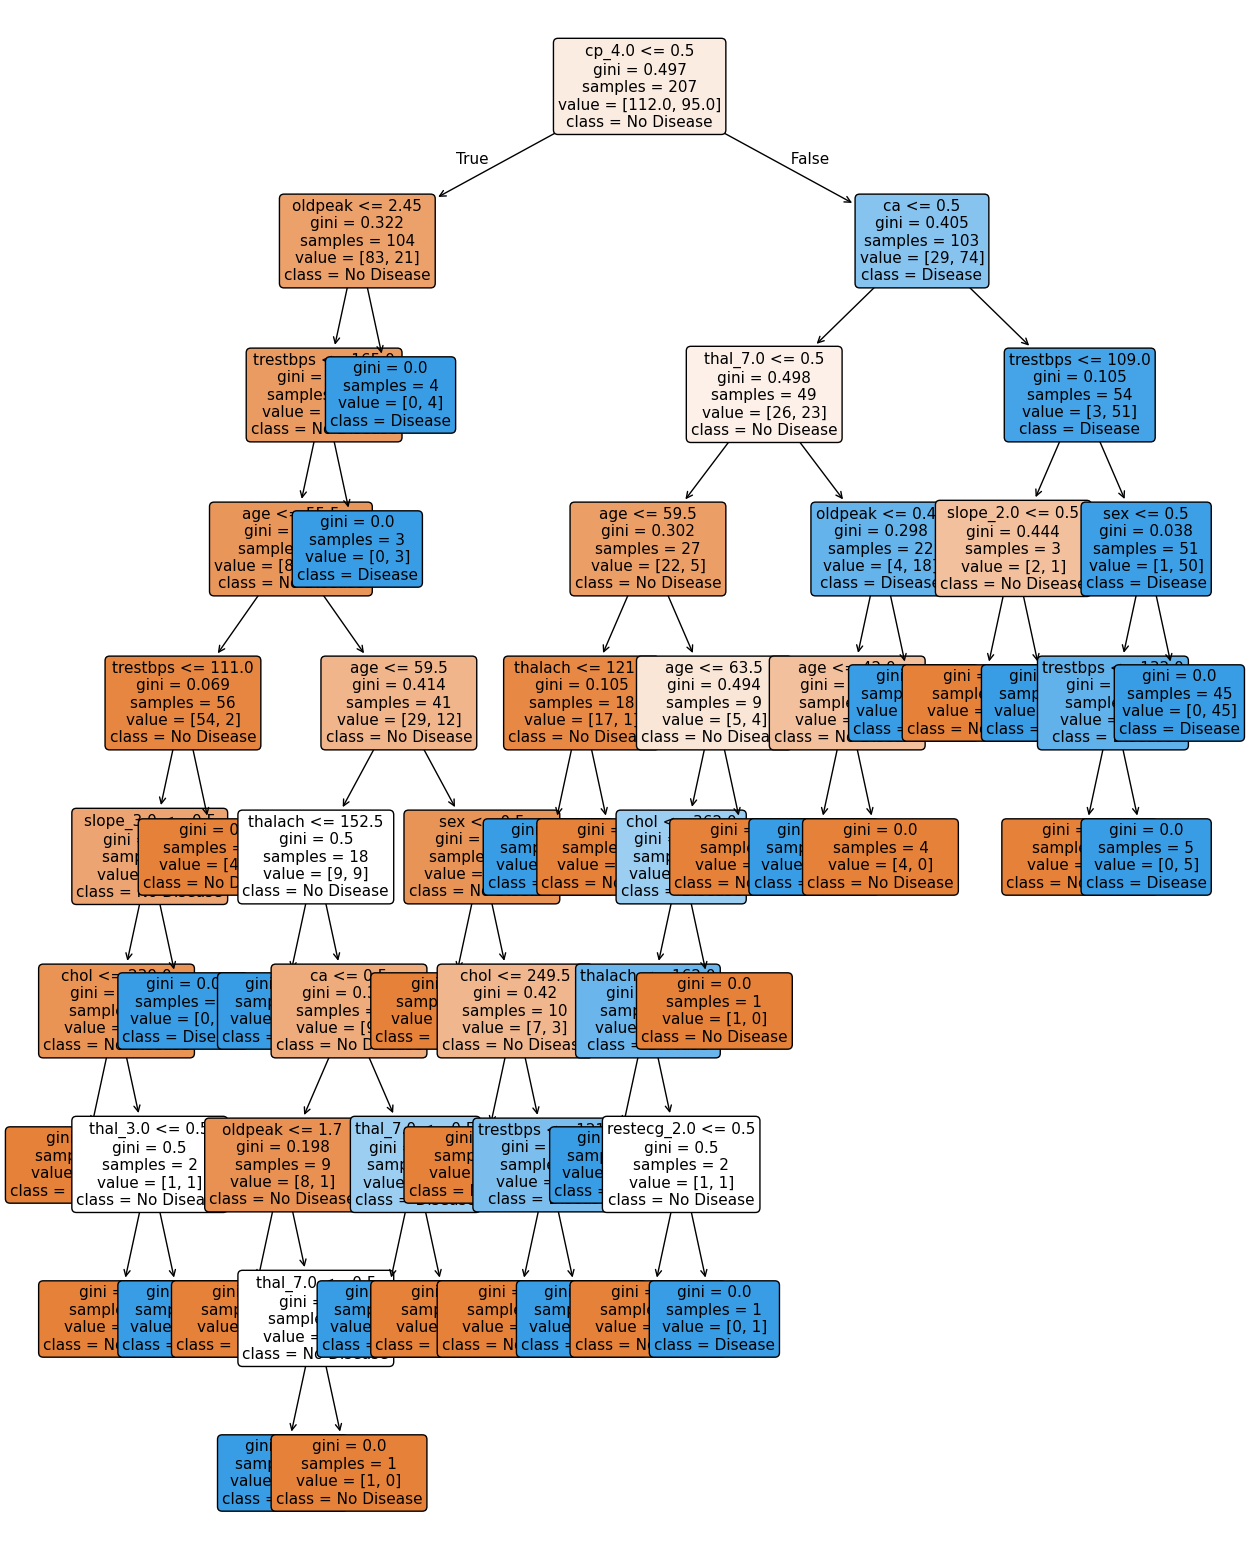

In [27]:
plt.figure(figsize=(15,20))

plot_tree(
    model,
    feature_names=X_encoded.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=11
)


plt.show()


Since the tree looks messy just for better visualization and understanding we will reduce the depth

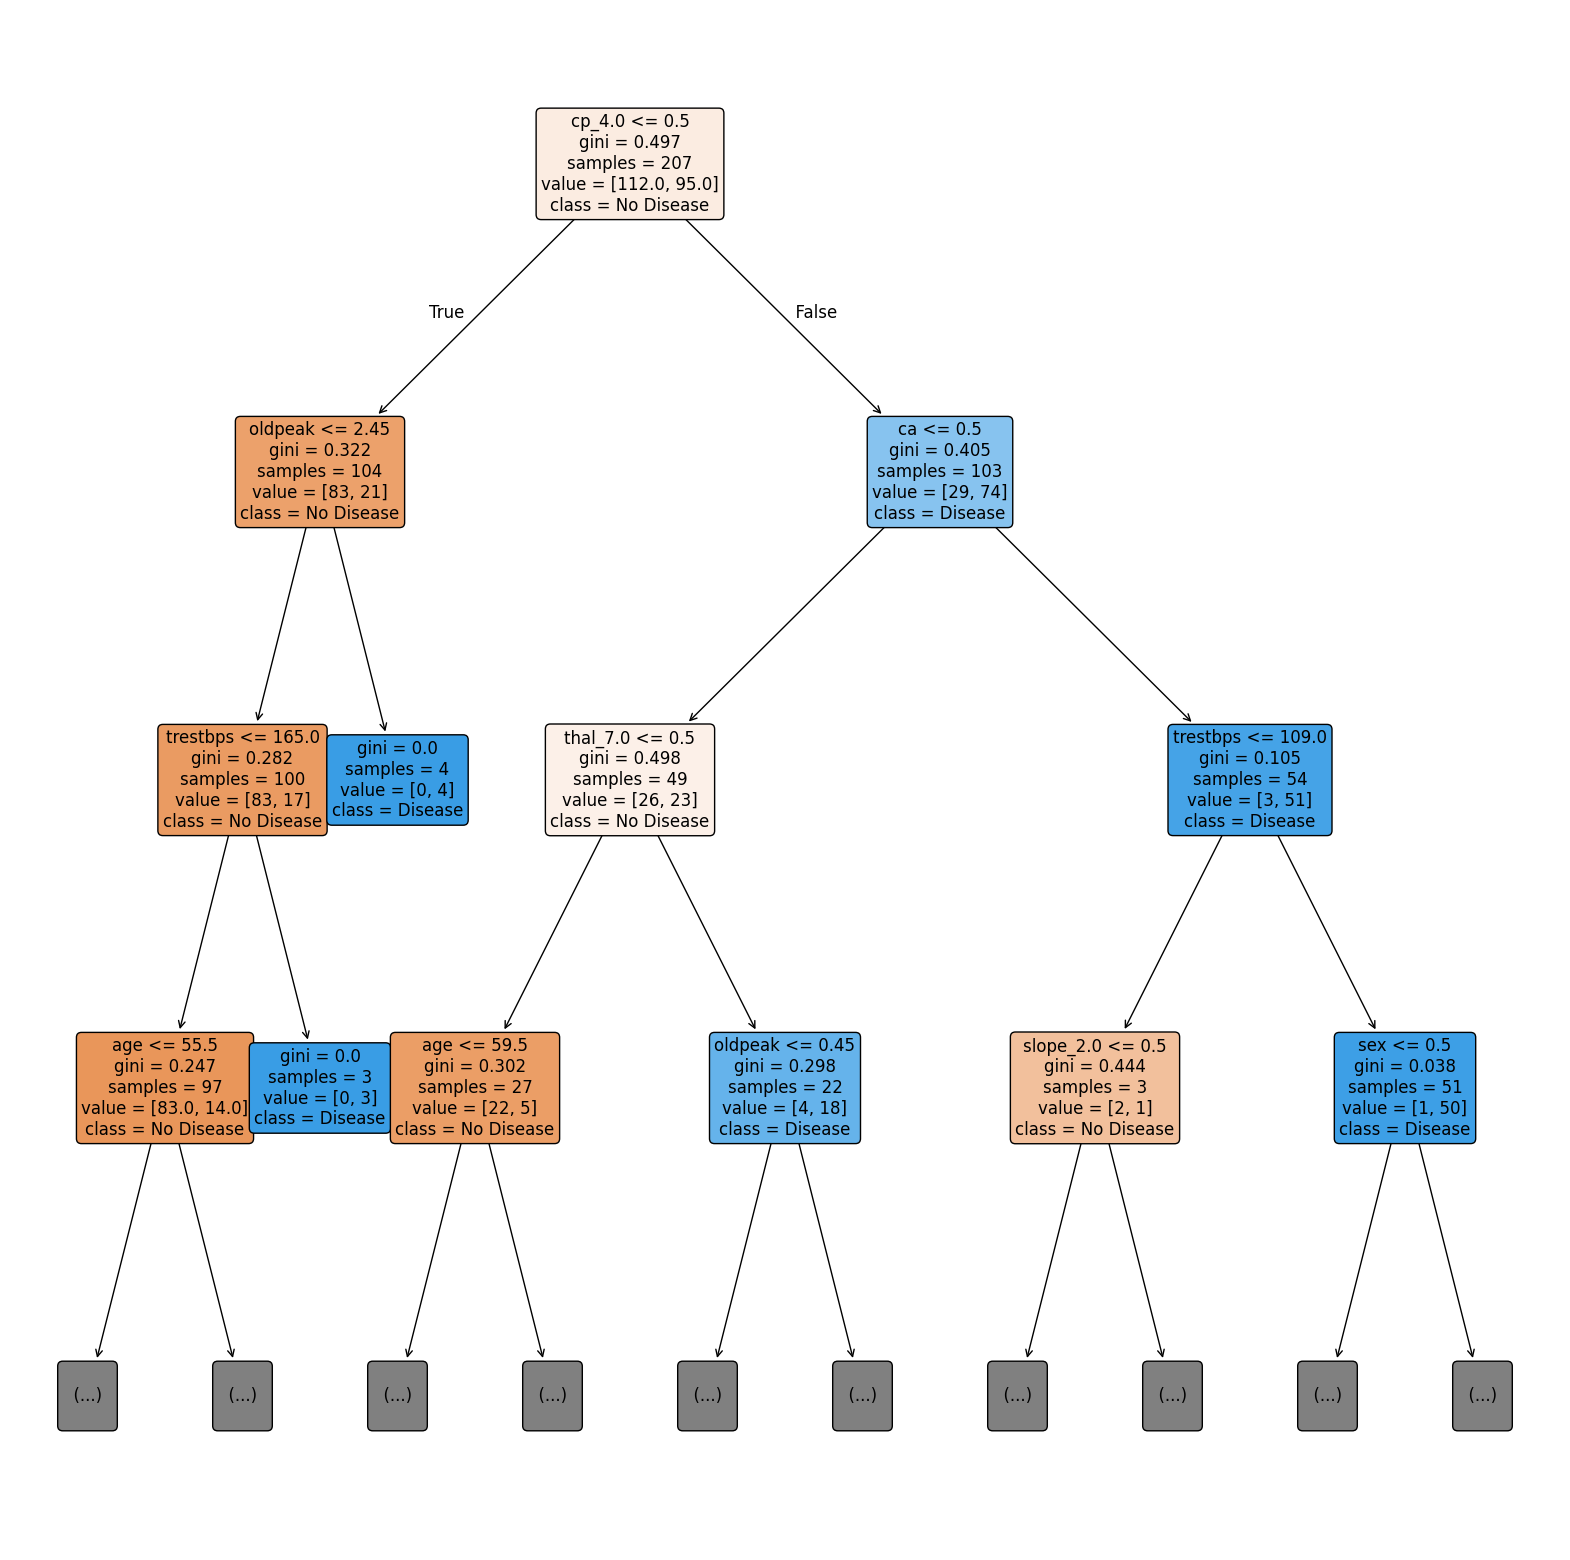

In [28]:
plt.figure(figsize=(20,20))

plot_tree(
    model,
    feature_names=X_encoded.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    max_depth=3, # Viewing only depth till 3
    fontsize=12
)


plt.show()

# Observing the root node and decoding it


1. cp_4.0 <= 0.5 is the split condition
2. gini = 0.497 tells how impure the node is. value closer to 0.5 means mixed split (50:50)
3. samples = 207 shows 207 data points reached this node (training set has 207 records)
4. values[112,95] represents raw class count, 112 - no disease , 95 - have disease
5. class = No disease Predicted class for root node. since 112 > 95











In [29]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("accuracy_train = ",accuracy_score(y_train,y_train_pred))
print("accuracy_test = ",accuracy_score(y_test,y_test_pred))


accuracy_train =  1.0
accuracy_test =  0.7444444444444445


There is a possibility of overfitting taking place considering the model performs 25 % less accurate in testing data.

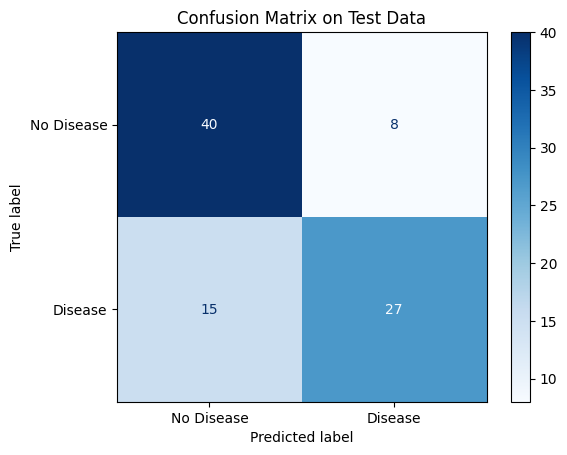

In [30]:
ConfusionMatrixDisplay.from_estimator(
    estimator=model,
    X=X_test,
    y=y_test,
    display_labels=["No Disease", "Disease"],
    cmap='Blues',
    normalize=None
)
plt.title("Confusion Matrix on Test Data")
plt.show()


In [32]:
cm = confusion_matrix(y_test, y_test_pred)

TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
Specificity = TN / (TN + FP)
Sensitivity    = TP / (TP + FN)

print(f"Accuracy : {accuracy:.2f}")
print(f"Specificity : {Specificity:.2f}")
print(f"Sensitivity : {Sensitivity:.2f}")



Accuracy : 0.74
Specificity : 0.83
Sensitivity : 0.64


1. Sensitivity/Recall = TP/(TP+FN) Percentage of actual positives correctly predicted
2. Specificity = TN/(TN + FP) Percentage of actual negatives correctly predicted

Finding Sensitivity and Specificity is Important for a Reason:
1. If correctly identifying **positives** is important for you then the model which has higher **sensitivity** should be selected.
2. If correctly identifying **negatives** is important for you then the model which has higher **specificity** should be selected.
3. Considering the table below we ought to increase our Sensitivity Value. this can be achieved by reducing False Negatives and increasing True Positives

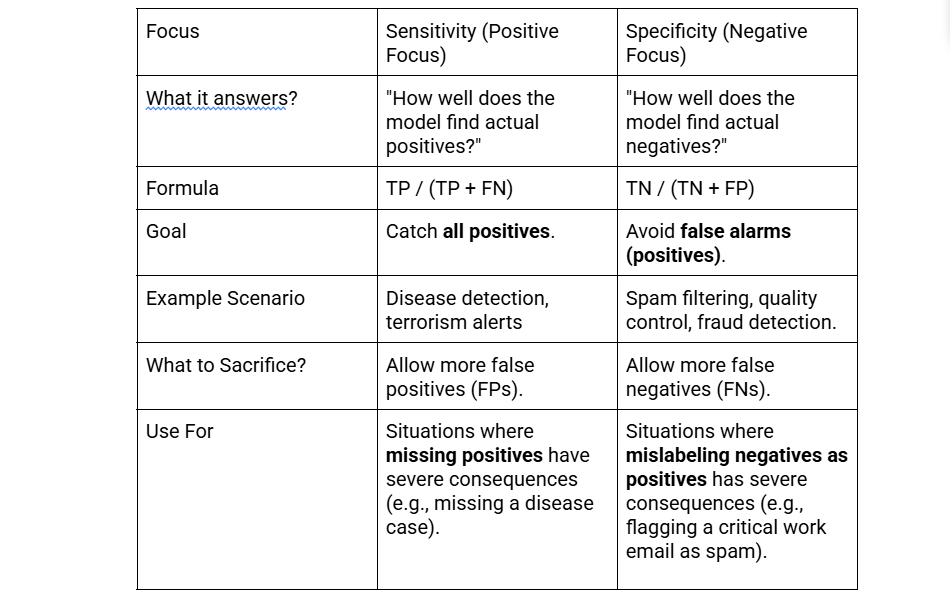





# Step 4: Preventing Overfitting by Pruning (CCP)

In [34]:
path = model.cost_complexity_pruning_path(X_train , y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
models = []
for ccp_alpha in ccp_alphas:
  model = DecisionTreeClassifier(random_state= 0 , ccp_alpha= ccp_alpha)
  model.fit(X_train,y_train)
  models.append(model)

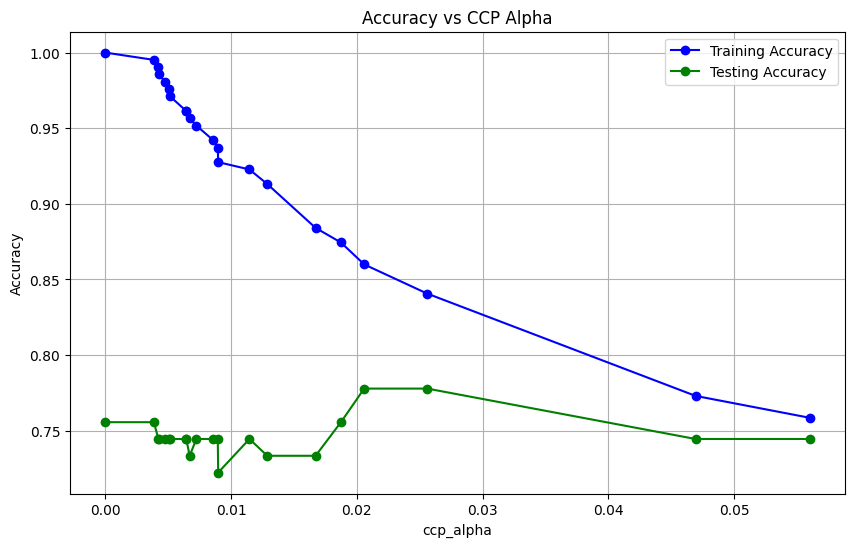

In [37]:
train_values = [model.score(X_train,y_train) for model in models]
test_values = [model.score(X_test,y_test) for model in models]

plt.figure(figsize=(10, 6))

plt.plot(ccp_alphas, train_values, marker='o', label='Training Accuracy', color='blue')
plt.plot(ccp_alphas, test_values, marker='o', label='Testing Accuracy', color='green')

plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.legend()
plt.grid(True)
plt.show()


We can notice here that the peak of testing accuracy occurs close to (0.021-0.022) Alpha. and comparatively the training accuracy is close to (85 -86 %) which is not bad. because before pruning we had 100 percent training accuracy (Which is a classic case of Overfitting.) **ccp_alpha = 0.021** gives a perfect choice which does well on both training (seen) and testing (unseen) data

# Step 5: K-Fold Cross Validation for Finding Best Alpha

What is the Purpose of K-Fold Cross Validation?
Problem: When we split the data into training and testing the results (accuracy) depends a lot on how the data was split.
 so how to make sure our model performance is fairly and reliably measured?
We use K-Fold cross Validation
1. Split your dataset into K equal parts (folds).
2. Use K−1 folds to train and 1 fold to test.
3. Repeat this K times, each time using a different fold as test
4. Finally, take the average accuracy from all K runs.

In [38]:
alpha_values = []

for ccp_alpha in ccp_alphas:
  model = DecisionTreeClassifier(random_state = 0 , ccp_alpha = ccp_alpha)
  scores = cross_val_score(model,X_train,y_train, cv =5) # 5 fold cross validation
  alpha_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
  result = pd.DataFrame(alpha_values,columns=['alpha','mean accuracy','std'])



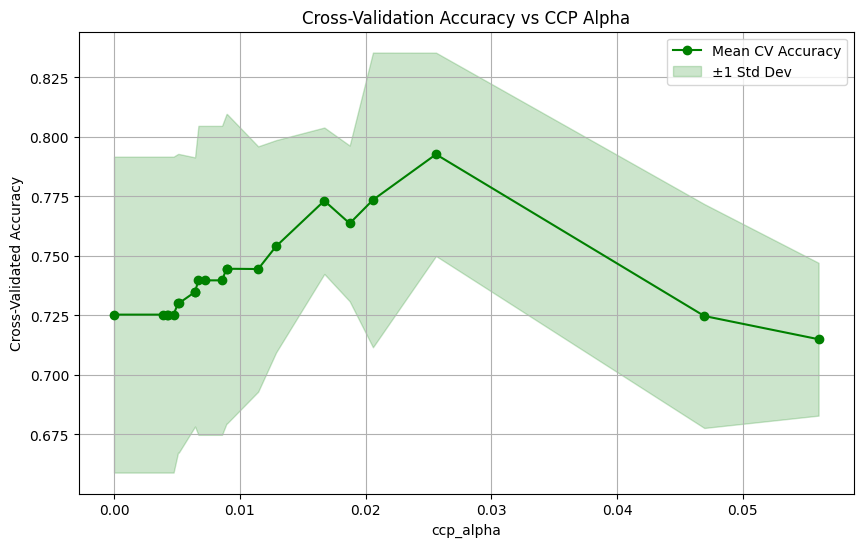

In [40]:
alpha = result['alpha']
mean_acc = result['mean accuracy']
std_acc = result['std']

plt.figure(figsize=(10, 6))

plt.plot(alpha, mean_acc, marker='o', label='Mean CV Accuracy', color='green')
plt.fill_between(alpha, mean_acc - std_acc, mean_acc + std_acc, alpha=0.2, color='green', label='±1 Std Dev')

plt.xlabel("ccp_alpha")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Cross-Validation Accuracy vs CCP Alpha")
plt.legend()
plt.grid(True)
plt.show()


Decoding the graph we come to understand that the best value for alpha is close to 0.025. which has the highest mean accuracy of approximately 79 percent.

In [46]:
true_alpha = result[(result['alpha'] > 0.021) & (result['alpha'] < 0.03)]['alpha'].values[0]
print(true_alpha)

0.02560014864362689


# Step 6: Final Model Building with True_CCP_alpha

In [47]:
model_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha = true_alpha)
model_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.02560014864362689),
                       random_state=42)

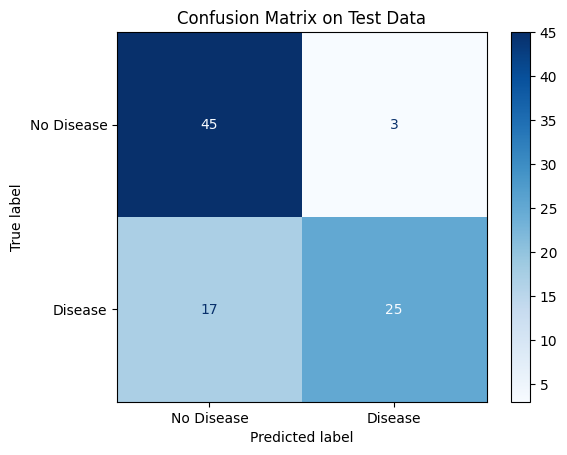

In [48]:
ConfusionMatrixDisplay.from_estimator(
    estimator=model_pruned,
    X=X_test,
    y=y_test,
    display_labels=["No Disease", "Disease"],
    cmap='Blues',
    normalize=None
)
plt.title("Confusion Matrix on Test Data")
plt.show()

In [50]:
y_train_pred = model_pruned.predict(X_train)
y_test_pred = model_pruned.predict(X_test)
print("accuracy_train = ",accuracy_score(y_train,y_train_pred))
print("accuracy_test = ",accuracy_score(y_test,y_test_pred))

accuracy_train =  0.8405797101449275
accuracy_test =  0.7777777777777778


In [51]:
cm = confusion_matrix(y_test, y_test_pred)

TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
Specificity = TN / (TN + FP)
Sensitivity    = TP / (TP + FN)

print(f"Accuracy : {accuracy:.2f}")
print(f"Specificity : {Specificity:.2f}")
print(f"Sensitivity : {Sensitivity:.2f}")

Accuracy : 0.78
Specificity : 0.94
Sensitivity : 0.60


# Final Understanding About the Model:

1. **Specificity is high (94%)** - Model is excellent at ruling out people who dont have a Heart Disease only 3 out of 48 people were wrongly classified as having Heart Disease when they Actually did not.

2. **Decent Overall Accuracy (78%)** - Identifies 78 out of 100 cases overall.

3. **Sensitivity is Low (60%)** - Model is not so good at predicting people who actually have a Heart Disease. out of 42 people who actually have a Heart Disease only 25 were correctly classified of actually having the Heart Disease

# Final Conculsion for Doctors and When to use this Model:

1. This Model is good for ruling out Heart Disease
2. Use this model as a Screening tool to reduce Unnecessary tests. If a model says No disease there is a solid 94% chance the person does not have the disease.
3. Use Case: Preliminary screening in large population, especially where Medical Test is Costly. and Doctors want to quickly filter out low risk patients.

4. Just Imagine How much resources/Medical Equipments we need to check for heart disease for a population like 1 million or more. this drastically reduces cost and time. which can mean a lot to the unpriveldged. and people dont have to spend a lot of money on lab tests. if they go through this initial screening by this model.

5. Bad for making the final Diagnoses. What I think about this model is: This is one step at the right direction not the entire solution. when you do massive medical campaigns this model can reduce critical resources/equipment going to low risk or not urgent patients. all the available resources and other concrete diagnoses mechanisms can be directed towards the needy.


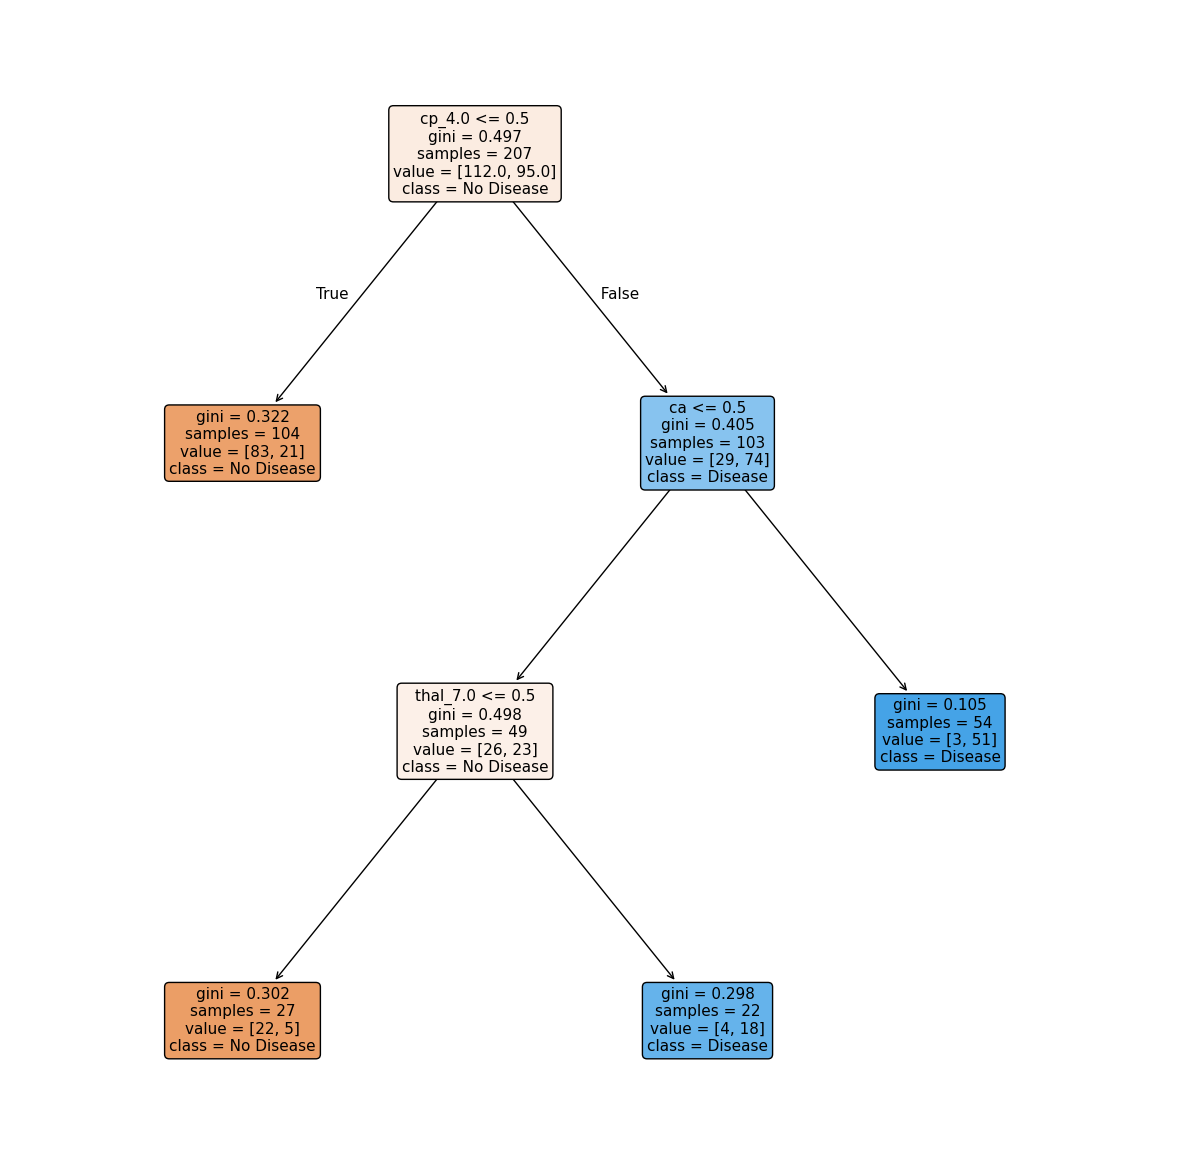

In [52]:
plt.figure(figsize=(15,15))

plot_tree(
    model_pruned,
    feature_names=X_encoded.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=11
)


plt.show()

# Learnings and outcomes:
1. Final D.T after pruning has been plotted which is a lot less complex compared to the base model and each leaves have sufficient samples to avoid overfitting.
2. WRT to learning. I learnt a lot about solving real world Issues through ML models. This assignment tested the depth of my knowledge base. and what it means to be a Good ML Engineer. The only regret I have is the sensitivity values turns out to be low in my model. which is very important for models based on predicting diseases. I have given my best in Improving the model nevertheless.
3. Overall had a good feeling in developing some thing which can solve real world problems.